# IPL Data Analysis(2008-2019)
Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. The league was founded by Board of Control for Cricket India (BCCI) in 2008. There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season.

The dataset has been downloaded from Kaggle Dataset. The dataset contains two csv files but only one csv file i.e matches.csv has been used in this project for the analysis. The libraries for data analysis and visualization used in this project are Numpy, Pandas, Matplotlib and Seaborn. These libraries are covered in the course by Jovian.ml named as Data Analysis with Python: Zero to Pandas.

## Data Preparation and Cleaning

In this step we will perform the following process:

Install and import the upgraded version of all libraries to be used in the project
* Analyse the dataset available with us
* Find the missing data, if possible
* Reason of missing data



In [1]:
#Installing the upgraded version of all libraries
!pip install numpy pandas matplotlib seaborn --upgrade --quiet

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Global Settings
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 7.5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style("darkgrid")

In [4]:
#Reading the matches.csv into matches_df dataframe
df = pd.read_csv('matches.csv')

In [5]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
df.describe

<bound method NDFrame.describe of         id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
#Dropping the column of umpires as we will not be using it for any data analysis
df.drop(columns=['umpire1','umpire2','umpire3'], inplace=True)

In [9]:
df.shape

(756, 15)

In [10]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [11]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

##Cleaning in Team Name:
1. In the above data, you can see there have been multiple name for the same team i.e Rising Pune Supergiants and Rising Pune Supergiant. It is due to ommission of 's'. Thus data cleaning is required for this error. 
2. In the above data, you can see that there are same team with two difeerent name Delhi Daredevils and Delhi Capitals. Earlier the team's name is Delhi Daredevils but its new name is Delhi Capital.Thus data cleaning is required for this error.

There will be three columns where the fix will be required

1. In team1 column
2. In team2 column
3. In winner column

In [12]:
#Using replace method in pandas library

df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)

In [13]:
#Finding the rows where the city is NaN
df[df.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


From the above, it can be observed that city where no value is placed is played in the Stadium Dubai International Cricket Stadium located in Dubai. Therefore, the city in this will be Dubai.

In [14]:
#placing city value to Dubai where there is no value
df.loc[[461,462,466,468,469,474,476],'city'] = 'Dubai'

In [15]:
df[df.result != 'normal']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk"
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal"
400,401,2013,Bangalore,2013-04-16,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera"
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [17]:
#Finding the rows where the winner is NaN
df[df.winner.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


From the above, it can be seen that in cases where there is no result, winner and player_of_match data is missing

One thing you can also notice that in city there are multiple name for the same city i.e Bangalore and Bengaluru

In [18]:
#Making Bangalore as Bengaluru
df.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)
df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

## Exploratory Analysis and Visualization

This section will consist of general analysis of the matches dataframe



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
#Finding the number of IPL matches played till 2019
df.id.count()

756

In [20]:
#Finding the number of teams who played IPL till 2019
print(df.team1.unique())
print('{} different teams played the IPL from 2008-2019'.format(df.team1.unique().shape[0]))

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']
13 different teams played the IPL from 2008-2019


##NUMBER OF MATCHES IN EACH SEASON

In [21]:
num_matches_df = df.groupby('season')[['id']].count()

In [22]:
num_matches_df

,id
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


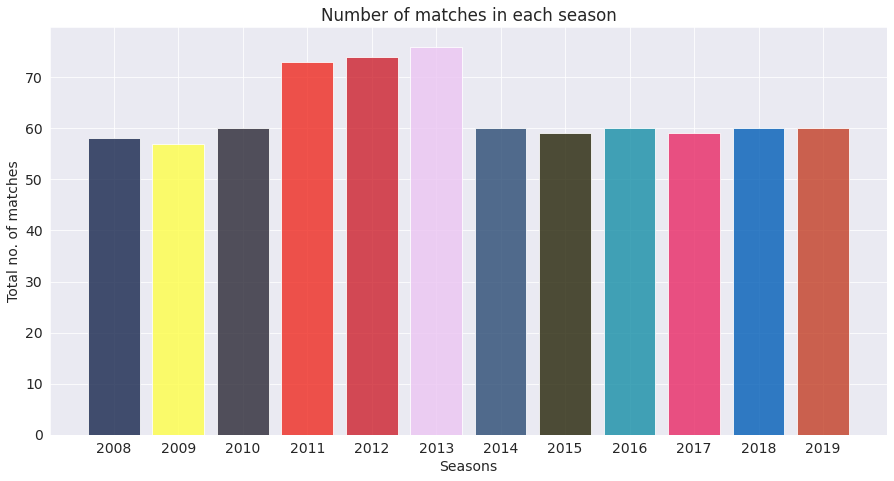

In [23]:
#Number of matches in each season
plt.title('Number of matches in each season')
plt.xlabel('Seasons')
plt.ylabel('Total no. of matches')
plt.xticks(num_matches_df.index)
plt.bar(num_matches_df.index,num_matches_df.id,width=0.8, color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
              '#294A73','#242307','#158EA6','#E82865',
             '#005DB7','#C23E25'], alpha=0.8);

Question emanated from the above graph: Why number of matches are greater in 2011,2012 and 2013 ?

##NUMBER OF MATCHES WON BY EACH TEAM

In [24]:
#Number of matches won by each team from 2008-2019

winner_df = df.groupby('winner')[['id']].count()
winner_df=winner_df.sort_values('id', ascending=False).reset_index()

winner_df.rename(columns = { 'id': 'matches_won','winner':'team'}, inplace = True)
winner_df

,team,matches_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


<BarContainer object of 13 artists>

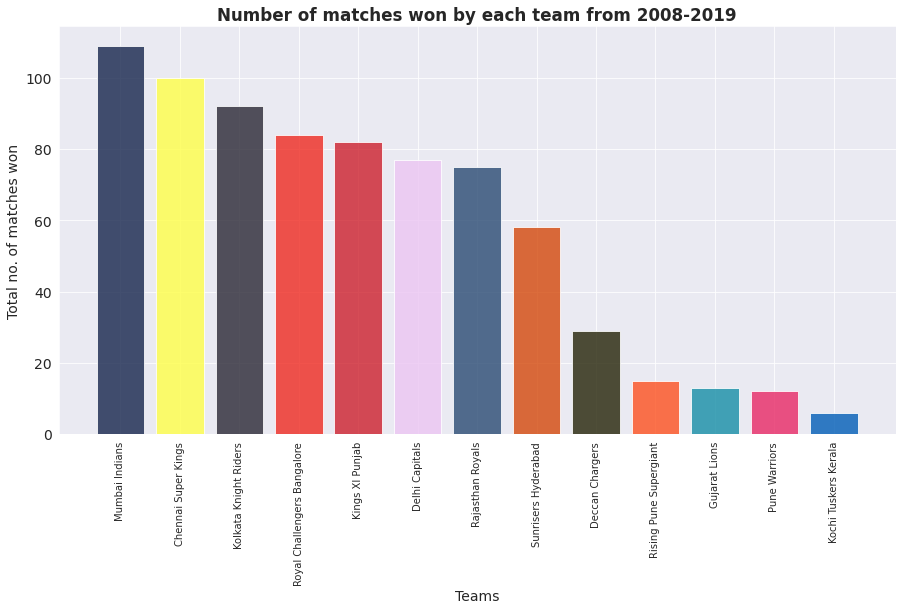

In [25]:
#Number of matches in each season
plt.title('Number of matches won by each team from 2008-2019',fontweight=800)
plt.xlabel('Teams')
plt.ylabel('Total no. of matches won')
plt.xticks(rotation=90,fontsize=10)
plt.bar(winner_df.team,winner_df.matches_won, color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82878'], alpha=0.8)

Question from the above graph: Why for some teams the number of wins are less than 20?

##COMPARISON BETWEEN MATCHES PLAYED AND MATCHES WON BY EACH TEAM

In [26]:
#Total Number of matches played by each team
matches_team = pd.concat([df['team1'],df['team2']])
matches_team_df=matches_team.value_counts().reset_index()  
#value_counts() return a Series containing counts of unique values.
#Series.reset_index() function generate a new DataFrame or Series with the index reset

matches_team_df.columns=['team','total_matches']   #Make two Columns Teams and Total Matches
matches_team_df.set_index('team',inplace=True)     #Sets Team as index
merged_stats_df=matches_team_df.merge(winner_df,on='team')
merged_stats_df['winning_percent'] = (merged_stats_df.matches_won/merged_stats_df.total_matches)*100
merged_stats_df

,team,total_matches,matches_won,winning_percent
0,Mumbai Indians,187,109,58.288770
1,Royal Challengers Bangalore,180,84,46.666667
2,Kolkata Knight Riders,178,92,51.685393
3,Delhi Capitals,177,77,43.502825
4,Kings XI Punjab,176,82,46.590909
5,Chennai Super Kings,164,100,60.975610
6,Rajasthan Royals,147,75,51.020408
7,Sunrisers Hyderabad,108,58,53.703704
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,12,26.086957


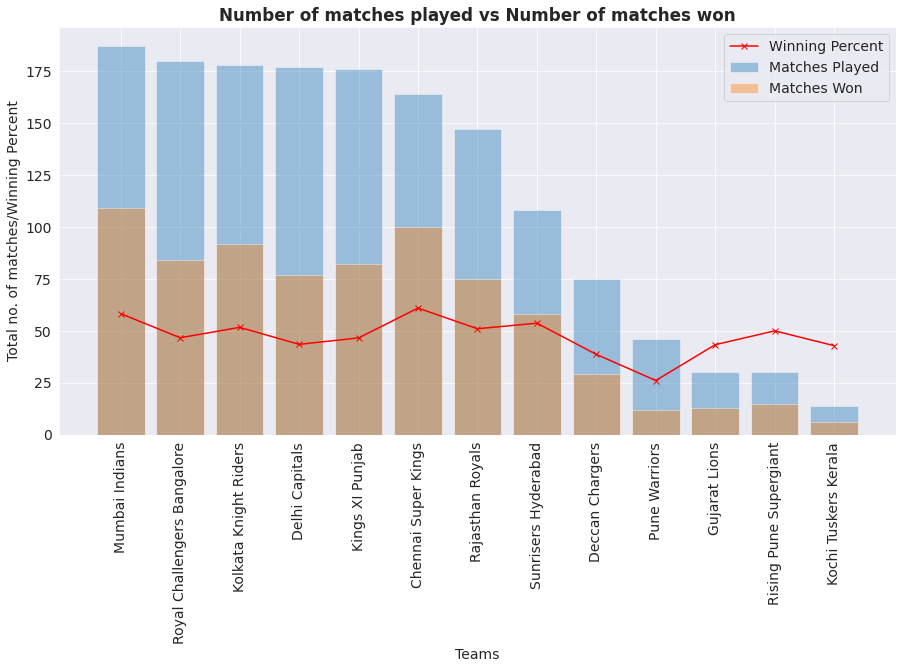

In [27]:
plt.title('Number of matches played vs Number of matches won',fontweight=800)
plt.xlabel('Teams')
plt.ylabel('Total no. of matches/Winning Percent')
plt.xticks(rotation=90)
plt.bar(merged_stats_df.team,merged_stats_df.total_matches,alpha=0.4)
plt.bar(merged_stats_df.team,merged_stats_df.matches_won, alpha=0.4)
plt.plot(merged_stats_df.team,merged_stats_df.winning_percent,'x-r')
plt.legend(['Winning Percent','Matches Played','Matches Won']);



Inferences:

1. Even though Mumbai Indians has won more matches but they have also played more matches than any other teams. Thus you can see that CSK with fewer matches have highest winning percentage
2. The question in the earlier graph can be answered here as why for some teams, the no. of wins are less than 20. This is due to less matches played by them as shown in the graph.

##MATCHES HOSTED BY EACH CITY

In [28]:
city_df = df.groupby('city')[['id']].count()
city_df=city_df.sort_values('id', ascending=False).reset_index()

city_df.rename(columns = { 'id': 'matches'}, inplace = True)
city_df

,city,matches
0,Mumbai,101
1,Bengaluru,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


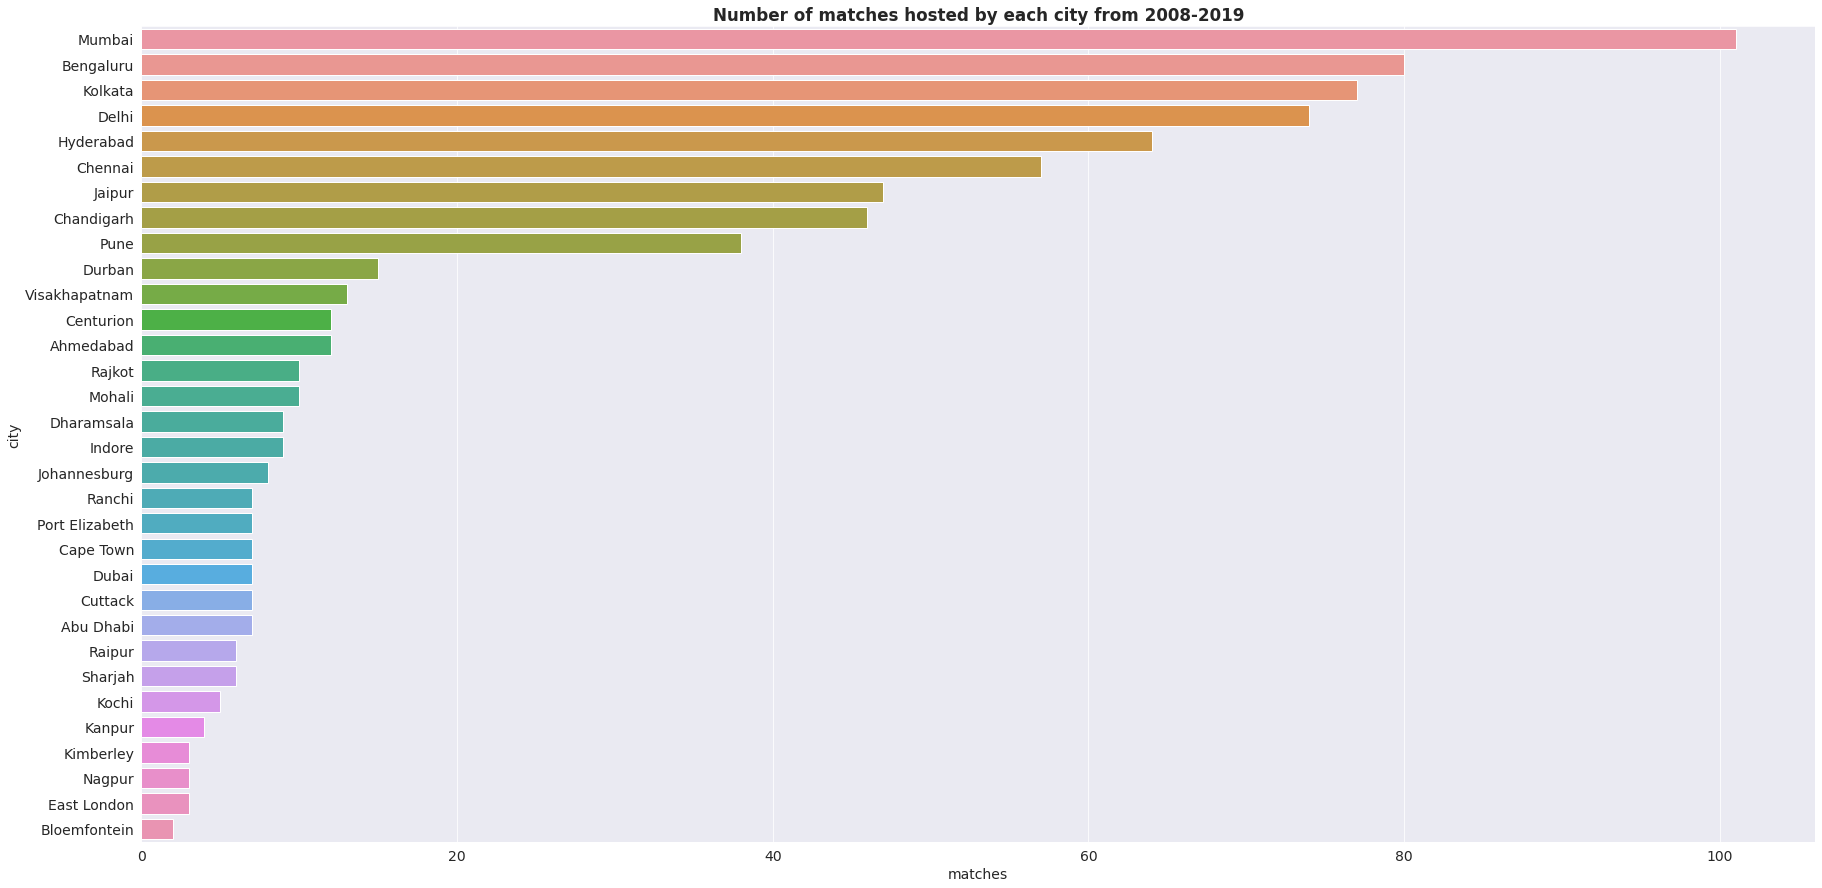

In [29]:
plt.figure(figsize=(30, 15))
plt.title('Number of matches hosted by each city from 2008-2019',fontweight=800)
sns.barplot(y='city', x='matches', data=city_df);

Mumbai Team Hosts the maximum number of Matches 

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions




Section-3: Interesting Questions
In this section the following questions will be asked:

1. Find the number of matches where toss winner is the match winner ?
2. Find the number of matches where team batting first is the match winner ?
3. Total matches played between MI and CSK and which team won most matches ?
4. Details of season winner and which team won most seasons? Also find the team which played most finals in IPL till 2019.
5. Who are the top 10 players with most number of Man of the Match ?
6. Why number of matches are greater in 2011,2012 and 2013 as graphically shown in Section-2?


#### Q1:Find the number of matches where toss winner is the match winner ?

In [30]:
match_toss_winner_df = df[df['toss_winner']==df['winner']]

match_toss_winner_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


The above table will also consist of those cases where result is tie and the toss winner won in super over Thus we have deduct those cases where result == tie in the above data frame

In [31]:
#Tie result
match_toss_winner_df = match_toss_winner_df[match_toss_winner_df.result != 'tie']
print('There are {} matches in the IPL played till now where toss winner is the winner of the match'.format(match_toss_winner_df.id.count()))

There are 350 matches in the IPL played till now where toss winner is the winner of the match


### Q2. Find the number of matches where team batting first is the match winner ?

In [32]:
count_toss_winner_decision_df = match_toss_winner_df['toss_decision'].value_counts() #toss_winner decisions
toss_loser_match_winner_df = df[df['toss_winner']!=df['winner']] #cases where toss loser is match winner
toss_loser_match_winner_df = toss_loser_match_winner_df[toss_loser_match_winner_df.result != 'tie'] #Removing tie cases
count_toss_decision_loser_df = toss_loser_match_winner_df['toss_decision'].value_counts() #toss_loser decisions-will be reverse of toss_winner
team_bat_first_won =count_toss_decision_loser_df.field+count_toss_winner_decision_df.bat
print('Total number of matches where team batting first is the winner of the match is {}'.format(team_bat_first_won))

Total number of matches where team batting first is the winner of the match is 350


### Q3:Total matches played between RCB and CSK and which team won most matches ?

In [33]:
rcb_csk=df[((df.team1 =="Royal Challengers Bangalore") &  (df.team2 =="Chennai Super Kings")) | 
                  
                  ((df.team2 =="Royal Challengers Bangalore") &  (df.team1 =="Chennai Super Kings"))]
rcb_csk

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
73,74,2008,Bengaluru,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium
106,107,2008,Chennai,2008-05-21,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,14,0,A Kumble,"MA Chidambaram Stadium, Chepauk"
121,122,2009,Port Elizabeth,2009-04-20,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park
158,159,2009,Durban,2009-05-14,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Royal Challengers Bangalore,0,2,LRPL Taylor,Kingsmead
172,173,2009,Johannesburg,2009-05-23,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,MK Pandey,New Wanderers Stadium
191,192,2010,Bengaluru,2010-03-23,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,36,0,RV Uthappa,M Chinnaswamy Stadium
201,202,2010,Chennai,2010-03-31,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Chennai Super Kings,0,5,M Vijay,"MA Chidambaram Stadium, Chepauk"
247,248,2011,Chennai,2011-04-16,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,21,0,MEK Hussey,"MA Chidambaram Stadium, Chepauk"
301,302,2011,Bengaluru,2011-05-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium
303,304,2011,Mumbai,2011-05-24,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SK Raina,Wankhede Stadium


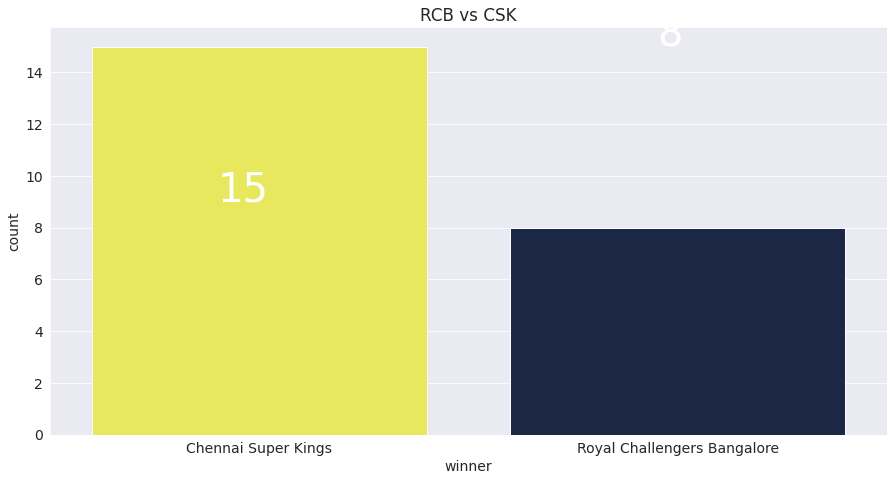

In [34]:
plt.title('RCB vs CSK')
sns.countplot(x=rcb_csk['winner'],palette=['#FFFF48','#15244C'])
plt.text(-0.1,9,s=rcb_csk['winner'].value_counts()['Chennai Super Kings'], color='white', size=40)
plt.text(0.95,15,s=rcb_csk['winner'].value_counts()['Royal Challengers Bangalore'], color='white', size=40);

### Q4: Details of season winner and which team won most seasons? Also find the team which played most finals in IPL till 2019.

In [35]:
#Creating a dataframe of final matches
final_match_df = df.groupby('season').tail(1).sort_values('season').reset_index()
final_match_df

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
1,173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
2,233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
3,306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
4,380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
5,456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
6,516,517,2014,Bengaluru,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
7,575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
8,635,636,2016,Bengaluru,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
9,58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [36]:
final_match_df['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

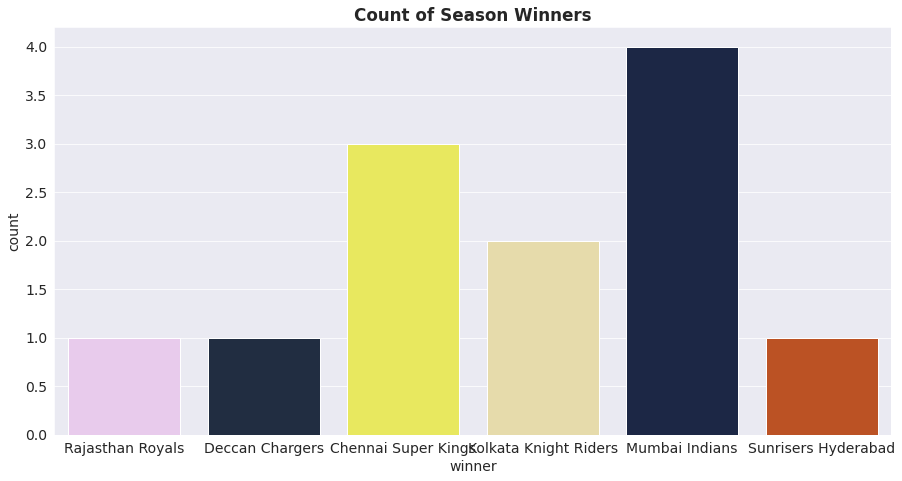

In [37]:
plt.title('Count of Season Winners',fontweight=800)
sns.countplot(x=final_match_df['winner'],palette=['#ECC5F2','#1C2C46','#FFFF48','#F0E1A1','#15244C','#D4480B']);

In [38]:
final_match_team = pd.concat([final_match_df['team1'],final_match_df['team2']])

In [39]:
final_match_team.value_counts()

Chennai Super Kings            8
Mumbai Indians                 5
Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Kolkata Knight Riders          2
Deccan Chargers                1
Rising Pune Supergiant         1
Rajasthan Royals               1
Kings XI Punjab                1
dtype: int64

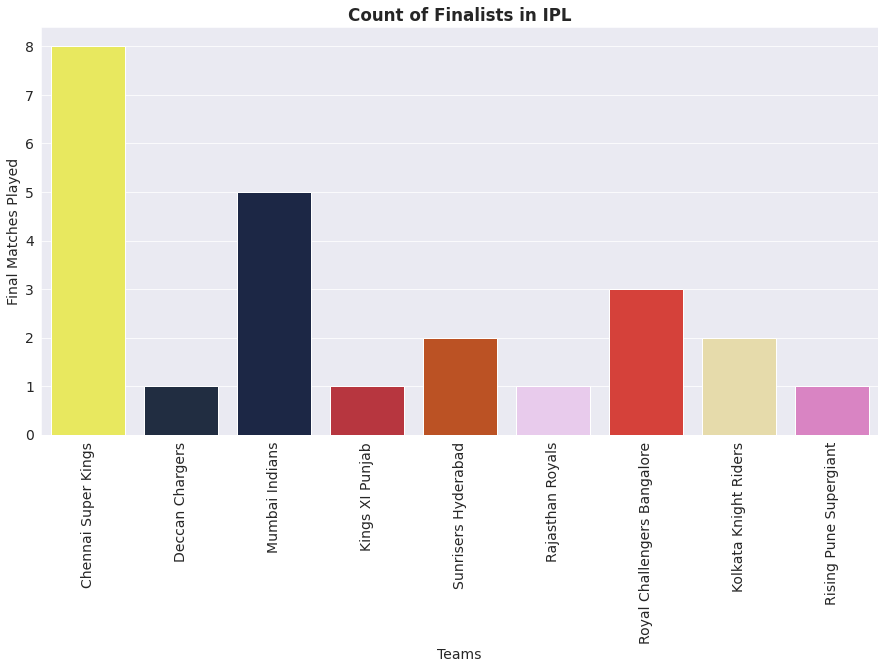

In [40]:
plt.title('Count of Finalists in IPL',fontweight=800)
plt.xlabel('Teams')
sns.countplot(x=final_match_team,palette=['#FFFF48','#1C2C46','#15244C','#CD202D','#D4480B','#ECC5F2','#EF2920','#F0E1A1','#E776CA'])
plt.ylabel('Final Matches Played')
plt.xticks(rotation=90);

### Q5: Who are the top 10 players with most number of Man of the Match ?

In [41]:
mom_count =df.groupby('player_of_match')[['id']].count()
mom_count = mom_count.sort_values('id',ascending=False).head(10)
mom_count

,id
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13


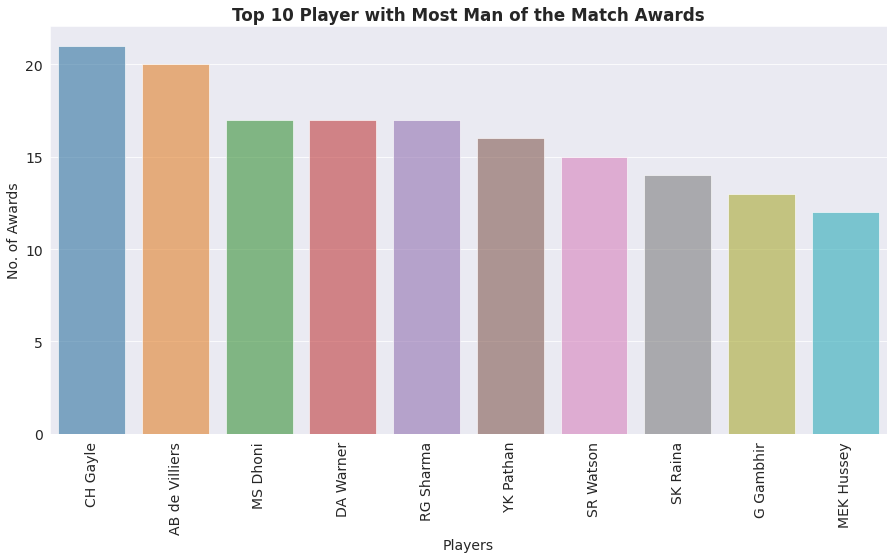

In [42]:
plt.title("Top 10 Player with Most Man of the Match Awards",fontweight=800 )
sns.barplot(x=mom_count.index,y=mom_count.id, alpha=0.6);
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,25,5))
plt.ylabel('No. of Awards')
plt.xlabel('Players');

###Q6. Why number of matches are greater in 2011,2012 and 2013 ?

This might be due to more teams in these years as compared to other years. Thus we have to find the number of teams played in each season



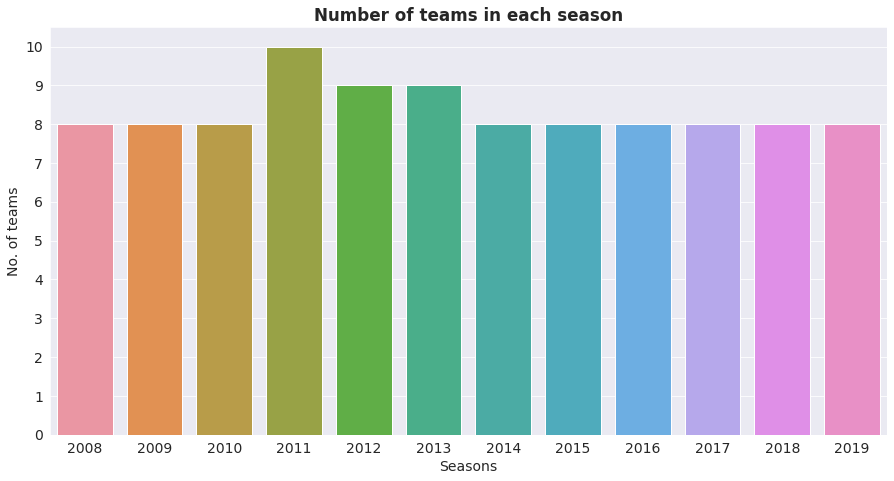

In [43]:
team_count=[];
for i in range(2008,2020):
    team_count.append(df[df.season == i].team1.unique().shape[0])

sns.barplot(x=np.arange(2008,2020),y=team_count)
plt.title('Number of teams in each season', fontweight=800)
plt.xlabel('Seasons')
plt.ylabel('No. of teams')
plt.yticks(np.arange(0,11));

The number of teams in 2011,2013 and 2013 are 10,9 and 9 respectively which is greater than number of teams in other seasons which is 8.



## Inferences and Conclusion

The above analysis on matches.csv can be summarised as below:

1. The teams in 2011,2012 and 2013 are greater than other seasons due to which matches played in those seasons are greater.
2. Even though Mumbai Indians have greater number of wins but winning percentage of Chennai Super King is higher than Mumbai Indians. But it may also be noted that when comparing the head to head matches between Mumbai Indians and Chennai Super King, Mumbai Indians have won most matches.
3. Chris Gayle has received highest number of Man of the Match Awards.
Chennai Super King entered into final matches of the IPL most of the times.
4. Out of 756 matches played in IPL till 2019
5. In 350 matches the toss winner wins the match
6. In 350 matches the team batting first wins the match It excludes cases where winner is decided by Super Over.
7. Mumbai has hosted most number of matches in the IPL

##Future Work
The dataset for IPL(2008-2019) consisted two .csv files i.e matches.csv and deliveries.csv. Only matches.csv is considered in this project for the analysis. For data related to scores, runs by individuals, wickets etc can be retrieved from deliveries.csv. Moreover matches.csv and deliveries.csv can be merged with respect to their match id and interesting data can be explored from the merged data.